# Final Project
Group 5: Janet Zhuang, Neel Barge, Yuxin Zhang, Zaurez Hamid, Ranchen Huang, Ming Tang, Zhangtao Ying

 
 
 
 
 


## Ask 1 - Data Collection
Data Sources

* JHU Datasets: https://coronavirus.jhu.edu/about/how-to-use-our-data
* Cases: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us
* Deaths: https://github.com/govex/COVID-19/blob/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv & https://raw.githubusercontent.com/govex/COVID-
* Vaccine: https://github.com/govex/COVID-19/blob/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv
* People Vaccinated: https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/people_vaccinated_us_timeline.csv
* Testing: https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/testing_data/time_series_covid19_US.csv 
* Dictionary files of above data:
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/README.md
https://github.com/govex/COVID-19/blob/master/data_tables/vaccine_data/us_data/data_dictionary.csv
https://github.com/govex/COVID-19/blob/master/data_tables/testing_data/data_dictionary.csv

## Set up

### create relational database

In [1]:
%load_ext sql

In [2]:
!dropdb -U student yxz1

In [3]:
!createdb -U student yxz1

In [4]:
%sql postgresql://student@/yxz1

## Ask1 Acquire data
#### Load cases and death data from 04/12/2020 to 11/15/2021

In [ ]:
!pwd

In [ ]:
!wget -i cases.csv

In [ ]:
!rm -f cases.csv

In [ ]:
!rm -f 11-16-2021.csv

In [ ]:
!rm -f 11-2*-2021.csv

In [ ]:
!rm -f 11-17-2021.csv

In [ ]:
!rm -f 11-18-2021.csv

In [ ]:
!rm -f 11-19-2021.csv

In [ ]:
!csvstack *.csv > cases_death.csv

In [ ]:
!wc -l cases_death.csv

In [ ]:
!rm -f *-2020.csv

In [ ]:
!rm -f *-2021.csv

#### Load vaccine data (12/10/2020 – 11/15/2021) and testing data

#### Loading Test

In [ ]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv

In [ ]:
!wc -l vaccine_data_us_timeline.csv

In [ ]:
# changing name to vaccine_data
!mv vaccine_data_us_timeline.csv vaccine_data.csv 

In [ ]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/testing_data/time_series_covid19_US.csv

In [ ]:
!wc -l time_series_covid19_US.csv

In [ ]:
# changing name to test_data
!mv time_series_covid19_US.csv test.csv 

#### Load vaccine data

In [ ]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/people_vaccinated_us_timeline.csv

In [ ]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv

In [ ]:
!mv people_vaccinated_us_timeline.csv ppl_vaccine_data.csv 

In [ ]:
!wc -l ppl_vaccine_data.csv 

In [ ]:
!wc -l test.csv

In [ ]:
!wc -l vaccine_data.csv

In [ ]:
!wc -l cases_death.csv

## Ask2 Surveying and Wrangling Data



### Table of cases and death

In [ ]:
!csvcut -n cases_death.csv

In [ ]:
!head -n 10000 cases_death.csv | csvstat

In [5]:
%%sql
DROP TABLE IF EXISTS casesdeath;

CREATE TABLE casesdeath(
    Province_State VARCHAR(30) NOT NULL,
    Country_Region VARCHAR(30) NOT NULL,
    Last_Update TIMESTAMP NULL,
    Lat NUMERIC NULL,
    Long_ NUMERIC NULL,
    Confirmed INTEGER NOT NULL,
    Deaths INTEGER NOT NULL,
    Recovered NUMERIC NULL,
    Active NUMERIC NULL,
    FIPS NUMERIC NULL,
    Incident_Rate NUMERIC NULL,
    Total_Test_Results NUMERIC NULL,
    People_Hospitalized NUMERIC NULL,
    Case_Fatality_Ratio NUMERIC NULL,
    UID NUMERIC NOT NULL,
    ISO3 VARCHAR(3) NOT NULL,
    Testing_Rate NUMERIC NULL,
    Hospitalization_Rate NUMERIC NULL
)

 * postgresql://student@/yxz1
Done.
Done.


[]

In [ ]:
!pwd

In [6]:
%%sql
COPY casesdeath FROM '/home/ubuntu/1116/cases_death.csv'
CSV
HEADER;

 * postgresql://student@/yxz1
33832 rows affected.


[]

In [ ]:
%%sql
SELECT COUNT(*) FROM casesdeath;

In [ ]:
!wc -l cases_death.csv

### Table of vaccine data

In [ ]:
!csvcut -n vaccine_data.csv

In [ ]:
!head -n 10000 vaccine_data.csv | csvstat
# check null values

In [7]:
%%sql
DROP TABLE IF EXISTS vaccine;

CREATE TABLE vaccine (
    Province_State VARCHAR(60) NOT NULL,
    Date TIMESTAMP NOT NULL,
    Vaccine_Type VARCHAR(11) NOT NULL,
    FIPS NUMERIC NULL,
    Country_Region VARCHAR(2) NULL,
    Lat NUMERIC NULL,
    Long_ NUMERIC NULL,
    Doses_alloc NUMERIC NULL,
    Doses_shipped NUMERIC NULL,
    Doses_admin NUMERIC NULL,
    Stage_One_Doses NUMERIC NULL,
    Stage_Two_Doses NUMERIC NULL,
    Combined_Key VARCHAR(50) NOT NULL
)

 * postgresql://student@/yxz1
Done.
Done.


[]

In [ ]:
!pwd

In [8]:
%%sql
COPY vaccine FROM '/home/ubuntu/1116/vaccine_data.csv'
CSV
HEADER;

 * postgresql://student@/yxz1
118444 rows affected.


[]

In [ ]:
%%sql
SELECT COUNT(*) FROM vaccine;

In [ ]:
!wc -l vaccine_data.csv

### Table of testing data

In [ ]:
!csvcut -n test.csv

In [ ]:
!head -n 10000 test.csv | csvstat

In [9]:
%%sql
DROP TABLE IF EXISTS test;

CREATE TABLE test(
    date TIMESTAMP NOT NULL,
    state VARCHAR(2) NOT NULL,
    cases_conf_probable INTEGER NULL,
    cases_confirmed INTEGER NULL,
    cases_probable INTEGER NULL,
    tests_viral_positive INTEGER NULL,
    tests_viral_negative INTEGER NULL,
    tests_viral_total INTEGER NULL,
    tests_antigen_positive INTEGER NULL,
    tests_antigen_total INTEGER NULL,
    people_viral_positive INTEGER NULL,
    people_viral_total INTEGER NULL,
    people_antigen_positive INTEGER NULL,
    people_antigen_total INTEGER NULL,
    encounters_viral_total INTEGER NULL,
    tests_combined_total INTEGER NULL
)

 * postgresql://student@/yxz1
Done.
Done.


[]

In [ ]:
!pwd

In [10]:
%%sql
COPY test FROM '/home/ubuntu/1116/test.csv'
CSV
HEADER;

 * postgresql://student@/yxz1
35900 rows affected.


[]

In [ ]:
%%sql
select count(*) from test

In [ ]:
!wc -l test.csv

### Table of People_vaccine_data

In [ ]:
!csvcut -n ppl_vaccine_data.csv

In [ ]:
!head -n 10000 ppl_vaccine_data.csv | csvstat

In [11]:
%%sql
DROP TABLE IF EXISTS ppl_vaccine;

CREATE TABLE ppl_vaccine (
    FIPS NUMERIC NULL,
    Province_State VARCHAR(60) NOT NULL,
    Country_Region VARCHAR(2) NULL,
    Date TIMESTAMP NOT NULL,
    Lat NUMERIC NULL,
    Long_ NUMERIC NULL,
    Combined_Key  VARCHAR(50) NOT NULL,
    People_Fully_Vaccinated NUMERIC NULL,
    People_Partially_Vaccinated NUMERIC NULL
)

 * postgresql://student@/yxz1
Done.
Done.


[]

In [12]:
%%sql
COPY ppl_vaccine FROM '/home/ubuntu/1116/ppl_vaccine_data.csv'
CSV
HEADER;

 * postgresql://student@/yxz1
21792 rows affected.


[]

In [ ]:
%%sql
select count(*) from ppl_vaccine

In [ ]:
!wc -l ppl_vaccine_data.csv

### Breif check on tables

In [13]:
%%sql
select * from vaccine
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,date,vaccine_type,fips,country_region,lat,long_,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,combined_key
Alabama,2020-12-10 00:00:00,All,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-10 00:00:00,Moderna,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-10 00:00:00,Pfizer,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-11 00:00:00,All,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"
Alabama,2020-12-11 00:00:00,Moderna,1,US,32.3182,-86.9023,None,None,None,None,None,"Alabama, US"


In [14]:
%%sql 
select * from test
limit 5

 * postgresql://student@/yxz1
5 rows affected.


date,state,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total
2020-03-06 00:00:00,AK,None,None,None,None,None,8,None,None,None,None,None,None,None,8
2020-03-07 00:00:00,AK,None,None,None,None,None,12,None,None,None,None,None,None,None,12
2020-03-08 00:00:00,AK,None,None,None,None,None,14,None,None,None,None,None,None,None,14
2020-03-09 00:00:00,AK,None,None,None,None,None,23,None,None,None,None,None,None,None,23
2020-03-10 00:00:00,AK,None,None,None,None,None,23,None,None,None,None,None,None,None,23


In [15]:
%%sql
select * from ppl_vaccine
limit 5

 * postgresql://student@/yxz1
5 rows affected.


fips,province_state,country_region,date,lat,long_,combined_key,people_fully_vaccinated,people_partially_vaccinated
1,Alabama,US,2020-12-10 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-11 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-12 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-13 00:00:00,32.3182,-86.9023,"Alabama, US",None,None
1,Alabama,US,2020-12-14 00:00:00,32.3182,-86.9023,"Alabama, US",None,None


In [16]:
%%sql
select * from casesdeath
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate
Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,7459.375895463867,3275341.0,None,1.3320683423240656,84000001.0,USA,66800.27369964625,None
Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,47019,206,7165.0,39615.0,2.0,6422.844801071706,1275750.0,None,0.4384284680543141,84000002.0,USA,174391.1857780451,None
American Samoa,US,2021-01-02 05:30:44,-14.271,-170.132,0,0,None,0.0,60.0,0.0,2140.0,None,None,16.0,ASM,3846.084721698028,None
Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,7285.171274003372,5155330.0,None,1.7000869373353424,84000004.0,USA,39551.860582022906,None
Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,7602.945718144717,2051488.0,None,1.6174022192972517,84000005.0,USA,67979.49767446793,None


### Do sample analysis of the dataset

In [ ]:
## What is the most popular state that people who do vanccined
!csvcut -c2 ppl_vaccine_data.csv|sort| uniq -c | sort -rn | head -10

In [ ]:
## What is the most popular vaccine type in vaccine_data?
!csvcut -c3 vaccine_data.csv|sort| uniq -c | sort -rn | head -10

# Ask 5 Dimension database

#### Star Schema

In [6]:
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/yqz5514/6305/main/star_schema.jpg")

#### Based on what analytial questions we are going to answer, we have included only necessary columns from relational database. For example, we excluded UID, FIPs from location becasue the state also could be a good natural key for location table. We did same thing on time table, we excluded hours, mins, seconds, etc becasue we wont use it for analysis. And in location table, state is natural key. For date table, full_time is natural key of that table. For vaccine type table, vaccine type is natural key. For surrogate key, we insert it for each diension table. And we added fk to each tables feom relational database, and merge them together and drop dimension columns as a facts table. But the facts table is very large, we always have loading problems.  

### location table

In [14]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location(
    key SERIAL PRIMARY KEY,
    state VARCHAR(64)
);

 * postgresql://student@/yxz1
Done.
Done.


[]

In [15]:
%%sql
insert into location(state)

select distinct Province_State as state
from casesdeath
union
select distinct Province_State as state
from vaccine
union
select distinct Province_State as state
from ppl_vaccine
union
select distinct state as state
from test

 * postgresql://student@/yxz1
124 rows affected.


[]

In [16]:
%%sql
select * from location
limit 5

 * postgresql://student@/yxz1
5 rows affected.


key,state
1,Arkansas
2,New Mexico
3,WV
4,Washington
5,MI


In [17]:
%%sql
ALTER TABLE casesdeath
ADD COLUMN loc_key INTEGER,
ADD CONSTRAINT fk_key
    FOREIGN KEY (loc_key)
    REFERENCES location (key);

 * postgresql://student@/yxz1
Done.


[]

In [18]:
%%sql
select * from casesdeath
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate,loc_key
Alabama,US,2021-01-02 05:30:44,32.3182,-86.9023,365747,4872,202137.0,158738.0,1.0,7459.375895463867,3275341.0,None,1.3320683423240656,84000001.0,USA,66800.27369964625,None,None
Alaska,US,2021-01-02 05:30:44,61.3707,-152.4044,47019,206,7165.0,39615.0,2.0,6422.844801071706,1275750.0,None,0.4384284680543141,84000002.0,USA,174391.1857780451,None,None
American Samoa,US,2021-01-02 05:30:44,-14.271,-170.132,0,0,None,0.0,60.0,0.0,2140.0,None,None,16.0,ASM,3846.084721698028,None,None
Arizona,US,2021-01-02 05:30:44,33.7298,-111.4312,530267,9015,76934.0,444318.0,4.0,7285.171274003372,5155330.0,None,1.7000869373353424,84000004.0,USA,39551.860582022906,None,None
Arkansas,US,2021-01-02 05:30:44,34.9697,-92.3731,229442,3711,199247.0,26484.0,5.0,7602.945718144717,2051488.0,None,1.6174022192972517,84000005.0,USA,67979.49767446793,None,None


In [19]:
%%sql
UPDATE casesdeath
SET loc_key = location.key
FROM location
WHERE casesdeath.province_state=location.state;

 * postgresql://student@/yxz1
33832 rows affected.


[]

In [20]:
%%sql
select * from casesdeath
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate,loc_key
Diamond Princess,US,2021-01-12 05:30:28,None,None,49,0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,23
Diamond Princess,US,2021-02-24 05:31:21,None,None,49,0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,23
Diamond Princess,US,2021-02-25 05:31:00,None,None,49,0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,23
Diamond Princess,US,2021-03-01 05:30:39,None,None,49,0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,23
Diamond Princess,US,2021-03-04 05:30:41,None,None,49,0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,23


In [21]:
%%sql
ALTER TABLE test
ADD COLUMN loc_key INTEGER,
ADD CONSTRAINT fk_key
    FOREIGN KEY (loc_key)
    REFERENCES location (key);

 * postgresql://student@/yxz1
Done.


[]

In [22]:
%%sql
select * from test
limit 2

 * postgresql://student@/yxz1
2 rows affected.


date,state,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total,loc_key
2020-03-06 00:00:00,AK,None,None,None,None,None,8,None,None,None,None,None,None,None,8,None
2020-03-07 00:00:00,AK,None,None,None,None,None,12,None,None,None,None,None,None,None,12,None


In [23]:
%%sql
UPDATE test
SET loc_key = location.key
FROM location
WHERE test.state=location.state;

 * postgresql://student@/yxz1
35900 rows affected.


[]

In [24]:
%%sql
select * from test
limit 5

 * postgresql://student@/yxz1
5 rows affected.


date,state,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total,loc_key
2020-03-04 00:00:00,IL,4,None,None,None,None,None,None,None,4,None,None,None,None,None,25
2020-03-07 00:00:00,ND,None,None,None,None,None,None,None,None,None,None,None,None,None,None,108
2020-03-05 00:00:00,NM,0,None,None,None,None,None,None,None,0,None,None,None,None,None,19
2020-03-04 00:00:00,OR,None,None,None,None,None,None,None,None,None,None,None,None,None,None,35
2020-03-14 00:00:00,OR,30,None,None,None,None,None,None,None,30,None,None,None,None,None,35


In [25]:
%%sql
ALTER TABLE vaccine
ADD COLUMN loc_key INTEGER,
ADD CONSTRAINT fk_key
    FOREIGN KEY (loc_key)
    REFERENCES location (key);

 * postgresql://student@/yxz1
Done.


[]

In [26]:
%%sql
UPDATE vaccine
SET loc_key = location.key
FROM location
WHERE vaccine.province_state=location.state;

 * postgresql://student@/yxz1
118444 rows affected.


[]

In [60]:
%%sql
select * from vaccine
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,date,vaccine_type,fips,country_region,lat,long_,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,combined_key,loc_key
Iowa,2020-12-10 00:00:00,All,19,US,42.0115,-93.2105,None,None,None,None,None,"Iowa, US",113
Arizona,2021-03-25 00:00:00,Unknown,4,US,33.7298,-111.4312,None,None,None,None,None,"Arizona, US",97
Indiana,2020-12-27 00:00:00,Pfizer,18,US,39.8494,-86.2583,None,None,None,None,None,"Indiana, US",19
Indiana,2020-12-28 00:00:00,All,18,US,39.8494,-86.2583,None,None,None,None,None,"Indiana, US",19
Indiana,2020-12-28 00:00:00,Moderna,18,US,39.8494,-86.2583,None,None,None,None,None,"Indiana, US",19


In [27]:
%%sql
ALTER TABLE ppl_vaccine
ADD COLUMN loc_key INTEGER,
ADD CONSTRAINT fk_key
    FOREIGN KEY (loc_key)
    REFERENCES location (key);

 * postgresql://student@/yxz1
Done.


[]

In [28]:
%%sql
UPDATE ppl_vaccine
SET loc_key = location.key
FROM location
WHERE ppl_vaccine.province_state=location.state;

 * postgresql://student@/yxz1
21792 rows affected.


[]

In [29]:
%%sql
select * from ppl_vaccine
limit 3

 * postgresql://student@/yxz1
3 rows affected.


fips,province_state,country_region,date,lat,long_,combined_key,people_fully_vaccinated,people_partially_vaccinated,loc_key
1,Alabama,US,2020-12-10 00:00:00,32.3182,-86.9023,"Alabama, US",None,None,67
1,Alabama,US,2020-12-11 00:00:00,32.3182,-86.9023,"Alabama, US",None,None,67
1,Alabama,US,2020-12-12 00:00:00,32.3182,-86.9023,"Alabama, US",None,None,67


In [63]:
!wc -l ppl_vaccine_data.csv

21793 ppl_vaccine_data.csv


### date dimension table

In [30]:
%%sql
DROP TABLE if exists date;

CREATE TABLE date(
    key SERIAL PRIMARY KEY,
    full_time CHAR(19),
    full_date CHAR(10),
    year INTEGER,
    month INTEGER,
    day INTEGER

)

 * postgresql://student@/yxz1
Done.
Done.


[]

In [31]:
%%sql
INSERT INTO date (full_time,full_date, year,month, day)
SELECT DISTINCT TO_CHAR(last_update, 'YYYY-MM-DD HH24:00:00') AS full_time,
    TO_CHAR(last_update, 'YYYY-MM-DD') AS full_date, 
    CAST(TO_CHAR(last_update, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(last_update, 'MM') AS INTEGER) AS year,
    CAST(TO_CHAR(last_update, 'DD') AS INTEGER) AS day
FROM casesdeath
union
SELECT DISTINCT 
    TO_CHAR(Date, 'YYYY-MM-DD HH24:00:00') AS full_time,
    TO_CHAR(Date, 'YYYY-MM-DD') AS full_date, 
    CAST(TO_CHAR(Date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(Date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR(Date, 'DD') AS INTEGER) AS day
FROM vaccine
union
SELECT DISTINCT
    TO_CHAR(Date, 'YYYY-MM-DD HH24:00:00') AS full_time,
    TO_CHAR(Date, 'YYYY-MM-DD') AS full_date, 
    CAST(TO_CHAR(Date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(Date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR(Date, 'DD') AS INTEGER) AS day
FROM ppl_vaccine
union
SELECT DISTINCT
    TO_CHAR(date, 'YYYY-MM-DD HH24:00:00') AS full_time,
    TO_CHAR(date, 'YYYY-MM-DD') AS full_date, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day
FROM test

 * postgresql://student@/yxz1
1441 rows affected.


[]

In [32]:
%%sql
select * from date
limit 5

 * postgresql://student@/yxz1
5 rows affected.


key,full_time,full_date,year,month,day
1,2021-07-24 04:00:00,2021-07-24,2021,7,24
2,None,None,None,None,None
3,2020-09-10 04:00:00,2020-09-10,2020,9,10
4,2021-04-21 07:00:00,2021-04-21,2021,4,21
5,2021-01-31 00:00:00,2021-01-31,2021,1,31


In [33]:
%%sql
ALTER TABLE  casesdeath
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES date (key);

 * postgresql://student@/yxz1
Done.


[]

In [34]:
%%sql
UPDATE casesdeath
SET date_key = date.key
FROM date
WHERE TO_CHAR(casesdeath.last_update, 'YYYY-MM-DD HH24:00:00')=date.full_time;

 * postgresql://student@/yxz1
33813 rows affected.


[]

In [89]:
%%sql
select * from casedeath
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate,loc_key,date_key
Minnesota,US,2020-04-12 23:18:15,45.6945,-93.9002,1621,70,842,1551,27,32.77100367,37421,361,4.318322023,84000027,USA,756.5229662,22.27020358,35,200
Mississippi,US,2020-04-12 23:18:15,32.7416,-89.6787,2781,96,None,2685,28,96.05534114,21413,548,3.451995685,84000028,USA,739.6019489,19.70514204,74,200
Missouri,US,2020-04-12 23:18:15,38.4561,-92.2884,4352,120,None,4151,29,72.85659283,45200,988,2.764113375,84000029,USA,771.4026695,23.14359335,93,200
Guam,US,2020-04-12 23:18:15,13.4443,144.7937,133,5,58,128,66,80.98447899,826,13,3.759398496,316,GUM,502.9562379,9.77443609,17,200
Grand Princess,US,2020-04-12 23:18:15,None,None,103,0,0,103,999,None,None,None,0.0,84099999,USA,None,None,16,200


In [35]:
%%sql
ALTER TABLE  vaccine
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES date (key);

 * postgresql://student@/yxz1
Done.


[]

In [36]:
%%sql
UPDATE vaccine
SET date_key = date.key
FROM date
WHERE TO_CHAR(vaccine.Date, 'YYYY-MM-DD HH24:00:00')=date.full_time;

 * postgresql://student@/yxz1
118444 rows affected.


[]

In [92]:
%%sql
select * from vaccine
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,date,vaccine_type,fips,country_region,lat,long_,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,combined_key,loc_key,date_key
Arkansas,2020-12-10 00:00:00,All,5,US,34.9697,-92.3731,None,None,None,None,None,"Arkansas, US",2,754
Arkansas,2020-12-10 00:00:00,Moderna,5,US,34.9697,-92.3731,None,None,None,None,None,"Arkansas, US",2,754
Colorado,2020-12-10 00:00:00,Pfizer,8,US,39.0598,-105.3111,None,None,None,None,None,"Colorado, US",73,754
Colorado,2020-12-10 00:00:00,Moderna,8,US,39.0598,-105.3111,None,None,None,None,None,"Colorado, US",73,754
Arkansas,2020-12-10 00:00:00,Pfizer,5,US,34.9697,-92.3731,None,None,None,None,None,"Arkansas, US",2,754


In [37]:
%%sql
ALTER TABLE  ppl_vaccine
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES date (key);

 * postgresql://student@/yxz1
Done.


[]

In [38]:
%%sql
UPDATE ppl_vaccine
SET date_key = date.key
FROM date
WHERE TO_CHAR(ppl_vaccine.Date, 'YYYY-MM-DD HH24:00:00')=date.full_time;

 * postgresql://student@/yxz1
21792 rows affected.


[]

In [96]:
%%sql
select * from ppl_vaccine
limit 5

 * postgresql://student@/yxz1
5 rows affected.


fips,province_state,country_region,date,lat,long_,combined_key,people_fully_vaccinated,people_partially_vaccinated,loc_key,date_key
32,Nevada,US,2020-12-10 00:00:00,38.3135,-117.0554,"Nevada, US",None,None,1,754
42,Pennsylvania,US,2020-12-10 00:00:00,40.5908,-77.2098,"Pennsylvania, US",None,None,48,754
17,Illinois,US,2020-12-10 00:00:00,40.3495,-88.9861,"Illinois, US",None,None,53,754
33,New Hampshire,US,2020-12-10 00:00:00,43.4525,-71.5639,"New Hampshire, US",None,None,38,754
30,Montana,US,2020-12-10 00:00:00,46.9219,-110.4544,"Montana, US",None,None,49,754


In [39]:
%%sql
ALTER TABLE  test
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES date (key);

 * postgresql://student@/yxz1
Done.


[]

In [40]:
%%sql
UPDATE test
SET date_key = date.key
FROM date
WHERE TO_CHAR(test.date, 'YYYY-MM-DD HH24:00:00')=date.full_time;

 * postgresql://student@/yxz1
35900 rows affected.


[]

In [99]:
%%sql
select * from test
limit 5

 * postgresql://student@/yxz1
5 rows affected.


date,state,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total,loc_key,date_key
2020-01-13 00:00:00,WA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,84,26
2020-01-14 00:00:00,WA,0,None,None,None,None,None,None,None,0,None,None,None,None,None,84,133
2020-01-15 00:00:00,WA,0,None,None,None,None,None,None,None,0,None,None,None,None,None,84,1117
2020-01-16 00:00:00,WA,0,None,None,None,None,None,None,None,0,None,None,None,None,None,84,1311
2020-01-17 00:00:00,WA,0,None,None,None,None,None,None,None,0,None,None,None,None,None,84,589


### vaccine type

In [41]:
%%sql
DROP TABLE IF EXISTS vaccine_type;

CREATE TABLE vaccine_type(
    key SERIAL PRIMARY KEY,
    type VARCHAR(30)
);

 * postgresql://student@/yxz1
Done.
Done.


[]

In [42]:
%%sql
INSERT INTO vaccine_type (type)
select distinct Vaccine_type as type
from vaccine

 * postgresql://student@/yxz1
7 rows affected.


[]

In [43]:
%%sql
select * from vaccine_type
limit 5

 * postgresql://student@/yxz1
5 rows affected.


key,type
1,Unknown
2,Janssen
3,Pfizer
4,Unassigned
5,Moderna


In [44]:
%%sql
ALTER TABLE vaccine
ADD COLUMN type_key INTEGER,
ADD CONSTRAINT fk_vaccine_type
    FOREIGN KEY (type_key)
    REFERENCES vaccine_type (key);

 * postgresql://student@/yxz1
Done.


[]

In [45]:
%%sql
UPDATE vaccine
SET type_key = vaccine_type.key
FROM vaccine_type
WHERE vaccine.vaccine_type=vaccine_type.type

 * postgresql://student@/yxz1
118444 rows affected.


[]

In [105]:
%%sql
select * from vaccine
limit 5

 * postgresql://student@/yxz1
5 rows affected.


province_state,date,vaccine_type,fips,country_region,lat,long_,doses_alloc,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,combined_key,loc_key,date_key,type_key
Guam,2020-12-11 00:00:00,All,66,US,13.4443,144.7937,None,None,None,None,None,"Guam, US",17,1259,7
Georgia,2020-12-12 00:00:00,All,13,US,33.0406,-83.6431,None,None,None,None,None,"Georgia, US",20,543,7
Maryland,2020-12-16 00:00:00,Pfizer,24,US,39.0639,-76.8021,None,None,None,None,None,"Maryland, US",98,416,3
Maine,2020-12-17 00:00:00,All,23,US,44.6939,-69.3819,110775,None,None,None,None,"Maine, US",22,1292,7
Michigan,2020-12-17 00:00:00,Moderna,26,US,43.3266,-84.5361,173600,None,None,None,None,"Michigan, US",83,1292,5


### facts table


In [46]:
%%sql
DROP TABLE IF EXISTS facts;

create table facts as (select c.*,v.Date, v.Vaccine_Type, v.Doses_alloc, 
                         v.Doses_shipped, v.Doses_admin, v.Stage_One_Doses,v.type_key,v.Stage_Two_Doses, v.Combined_Key, p.people_fully_vaccinated
,p.people_partially_vaccinated,t.state
,t.cases_conf_probable,t.cases_confirmed,t.cases_probable,t.tests_viral_positive
,t.tests_viral_negative,t.tests_viral_total,t.tests_antigen_positive,
t.tests_antigen_total,t.people_viral_positive,t.people_viral_total,t.people_antigen_positive,
t.people_antigen_total,t.encounters_viral_total,t.tests_combined_total
from casesdeath c,vaccine v,ppl_vaccine p,test t
where to_char(c.last_update,'YYYY-MM-DD')=to_char(v.Date,'YYYY-MM-DD')
and c.province_state=v.province_state and to_char(c.last_update,'YYYY-MM-DD')=to_char(t.date,'YYYY-MM-DD')
and p.fips=v.fips and to_char(p.date,'YYYY-MM-DD')=to_char(v.Date,'YYYY-MM-DD'))

 * postgresql://student@/yxz1
Done.
5753216 rows affected.


[]

In [47]:
%%sql
ALTER table facts
drop column province_state, 
drop column country_region, 
drop column last_update, 
drop column lat, 
drop column long_, 
drop column FIPS, 
drop column uid, 
drop column iso3,
drop column date, 
drop column state,
drop column vaccine_type

 * postgresql://student@/yxz1
Done.


[]

In [48]:
%%sql
select * from facts
limit 5

 * postgresql://student@/yxz1
5 rows affected.


confirmed,deaths,recovered,active,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,testing_rate,hospitalization_rate,loc_key,date_key,doses_alloc,doses_shipped,doses_admin,stage_one_doses,type_key,stage_two_doses,combined_key,people_fully_vaccinated,people_partially_vaccinated,cases_conf_probable,cases_confirmed,cases_probable,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,tests_combined_total
280187,3985,174805.0,101397.0,5714.387688818594,2860384.0,None,1.4222644162648517,58337.264451575866,None,67,1253,None,None,None,None,7,None,"Alabama, US",None,None,428973,None,None,457528,4346546,4804074,39718,392041,391133,None,None,None,None,4804074
280187,3985,174805.0,101397.0,5714.387688818594,2860384.0,None,1.4222644162648517,58337.264451575866,None,67,1253,None,None,None,None,3,None,"Alabama, US",None,None,428973,None,None,457528,4346546,4804074,39718,392041,391133,None,None,None,None,4804074
280187,3985,174805.0,101397.0,5714.387688818594,2860384.0,None,1.4222644162648517,58337.264451575866,None,67,1253,None,None,None,None,5,None,"Alabama, US",None,None,428973,None,None,457528,4346546,4804074,39718,392041,391133,None,None,None,None,4804074
38736,150,7165.0,31392.0,5291.130415763897,1099555.0,None,0.3875268039372724,150305.85951650277,None,74,1253,None,None,None,None,3,None,"Alaska, US",None,None,428973,None,None,457528,4346546,4804074,39718,392041,391133,None,None,None,None,4804074
38736,150,7165.0,31392.0,5291.130415763897,1099555.0,None,0.3875268039372724,150305.85951650277,None,74,1253,None,None,None,None,7,None,"Alaska, US",None,None,428973,None,None,457528,4346546,4804074,39718,392041,391133,None,None,None,None,4804074


## data wrangling of dimension table and facts table.

In [49]:
%%sql
select * from date
limit 5

 * postgresql://student@/yxz1
5 rows affected.


key,full_time,full_date,year,month,day
1,2021-07-24 04:00:00,2021-07-24,2021,7,24
2,None,None,None,None,None
3,2020-09-10 04:00:00,2020-09-10,2020,9,10
4,2021-04-21 07:00:00,2021-04-21,2021,4,21
5,2021-01-31 00:00:00,2021-01-31,2021,1,31


In [50]:
%%sql
DELETE FROM date WHERE full_time IS NULL

 * postgresql://student@/yxz1
1 rows affected.


[]

In [22]:
%%sql
select * from location
limit 5

 * postgresql://student@/yxz1
5 rows affected.


key,state
1,Nevada
2,Arkansas
3,New Mexico
4,NY
5,South Dakota


In [26]:
%%sql
DELETE FROM location WHERE state IS NULL

 * postgresql://student@/yxz1
0 rows affected.


[]

In [24]:
%%sql
select * from vaccine_type
limit 5

 * postgresql://student@/yxz1
5 rows affected.


key,type
1,Unknown
2,Janssen
3,Pfizer
4,Unassigned
5,Moderna


# Ask 4 & 6 Analytical Analysis

## Question 1
## how does government regulation effect the spread of covid 19?

In [90]:
%%sql
select distinct province_state
from casesdeath


 * postgresql://student@/yxz1
59 rows affected.


province_state
Virgin Islands
Vermont
Nevada
New York
West Virginia
South Carolina
Hawaii
New Mexico
Arkansas
Missouri


In [90]:
%%sql
DROP TABLE if exists NY_dea_percentage_change;

CREATE TABLE NY_dea_percentage_change as (
select province_state,last_update,((Deaths -d_previous_day)*100/d_previous_day) as percentage_change
    from(
    SELECT *,
        LAG(Deaths) OVER(
            PARTITION BY province_state
            ORDER BY last_update) as d_previous_day
        FROM casesdeath) as a
    where province_state like 'New York'
)

 * postgresql://student@/yxz1
Done.
583 rows affected.


[]

In [91]:
%%sql


\copy NY_dea_percentage_change to 'NY_dea_percentage_change.csv' delimiter ',' csv header;

 * postgresql://student@/yxz1
0 rows affected.


[]

In [92]:
%%sql
DROP TABLE if exists FL_dea_percentage_change;

CREATE TABLE FL_dea_percentage_change as (select province_state,last_update,((Deaths -d_previous_day)*100/d_previous_day) as percentage_change
    from(
    SELECT *,
        LAG(Deaths) OVER(
            PARTITION BY province_state
            ORDER BY last_update) as d_previous_day
        FROM casesdeath) as a
    where province_state like 'Florida')

 * postgresql://student@/yxz1
Done.
583 rows affected.


[]

In [93]:
%%sql


\copy FL_dea_percentage_change to 'FL_dea_percentage_change.csv' delimiter ',' csv header;

 * postgresql://student@/yxz1
0 rows affected.


[]

In [87]:
%%sql
DROP TABLE if exists NY_con_percentage_change;

CREATE TABLE NY_con_percentage_change as (
    select province_state,last_update,Round((confirmed-confirmed_previous_day)*100/confirmed_previous_day,7) as percentage_change
    from(
    SELECT *,
        LAG(confirmed) OVER(
            PARTITION BY province_state
            ORDER BY last_update) as confirmed_previous_day
        FROM casesdeath) as a
    where province_state like 'New York'
)


 * postgresql://student@/yxz1
Done.
583 rows affected.


[]

In [88]:
%%sql


\copy NY_con_percentage_change to 'NY_con_percentage_change.csv' delimiter ',' csv header;

 * postgresql://student@/yxz1
0 rows affected.


[]

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [75]:
ny1 = pd.read_csv("NY_con_percentage_change.csv")
ny1.isnull().sum()

province_state       0
last_update          0
percentage_change    1
dtype: int64

In [76]:
ny1.head(5)

,province_state,last_update,percentage_change
0,New York,2020-04-12 23:18:15,NaN
1,New York,2020-04-13 23:07:54,3.0
2,New York,2020-04-14 23:33:31,3.0
3,New York,2020-04-15 22:56:51,5.0
4,New York,2020-04-16 23:30:51,4.0


In [77]:
ny1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   province_state     583 non-null    object 
 1   last_update        583 non-null    object 
 2   percentage_change  582 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.8+ KB


In [78]:
from datetime import datetime
#change the date column from object to date type
ny1['last_update'] = pd.to_datetime(ny1['last_update'],format='%y-%m-%d %H:%M:%S',exact=False)
#print the new types
ny1.dtypes

province_state               object
last_update          datetime64[ns]
percentage_change           float64
dtype: object

In [79]:
ny1.head(5)

,province_state,last_update,percentage_change
0,New York,2020-04-12 23:18:15,NaN
1,New York,2020-04-13 23:07:54,3.0
2,New York,2020-04-14 23:33:31,3.0
3,New York,2020-04-15 22:56:51,5.0
4,New York,2020-04-16 23:30:51,4.0


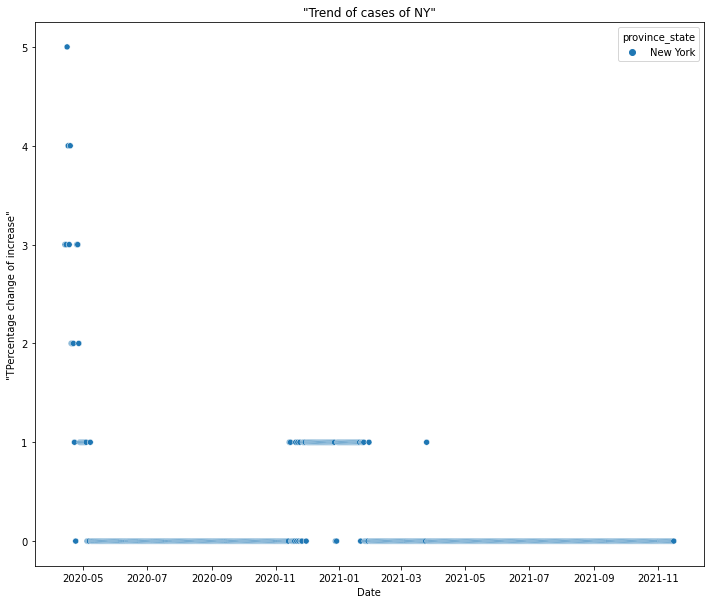

In [83]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.scatterplot(data=ny1, x='last_update', y='percentage_change',hue ='province_state')
plt.xlabel('Date')
plt.ylabel('"confirmed_percent_change"')
plt.title('"Confirmed Percent Change of NY"')
plt.show()

In [84]:
%%sql
DROP TABLE if exists FL_con_percentage_change;

CREATE TABLE FL_con_percentage_change as (
    select province_state,last_update,Round((confirmed-confirmed_previous_day)*100/confirmed_previous_day,7) as percentage_change
    from(
    SELECT *,
        LAG(confirmed) OVER(
            PARTITION BY province_state
            ORDER BY last_update) as confirmed_previous_day
        FROM casesdeath) as a
    where province_state like 'Florida'
)


 * postgresql://student@/yxz1
Done.
583 rows affected.


[]

In [86]:
%%sql


\copy FL_con_percentage_change to 'FL_con_percentage_change.csv' delimiter ',' csv header;

 * postgresql://student@/yxz1
0 rows affected.


[]

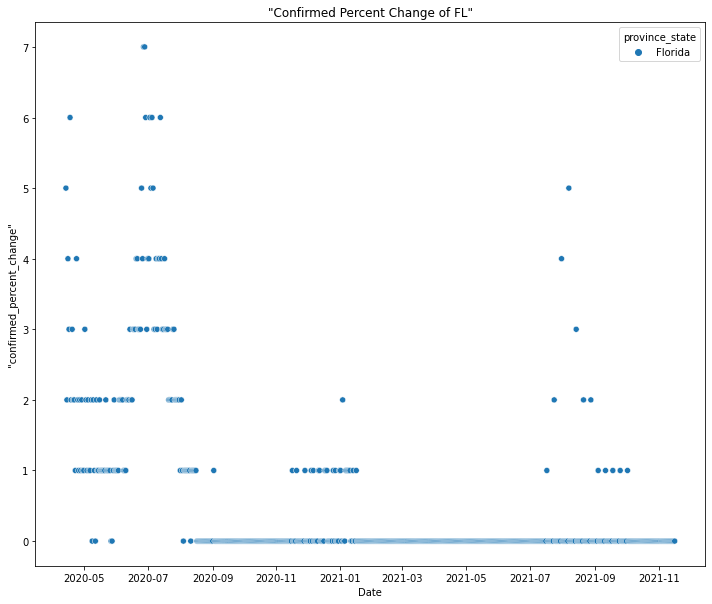

In [89]:
fl1 = pd.read_csv("FL_con_percentage_change.csv")
fl1.isnull().sum()

#fl1.info()

from datetime import datetime
#change the date column from object to date type
fl1['last_update'] = pd.to_datetime(fl1['last_update'],format='%y-%m-%d %H:%M:%S',exact=False)
#print the new types
#fl1.dtypes

import seaborn as sns
plt.figure(figsize=(12,10))
sns.scatterplot(data=fl1, x='last_update', y='percentage_change',hue ='province_state')
plt.xlabel('Date')
plt.ylabel('"confirmed_percent_change"')
plt.title('"Confirmed Percent Change of FL"')
plt.show()

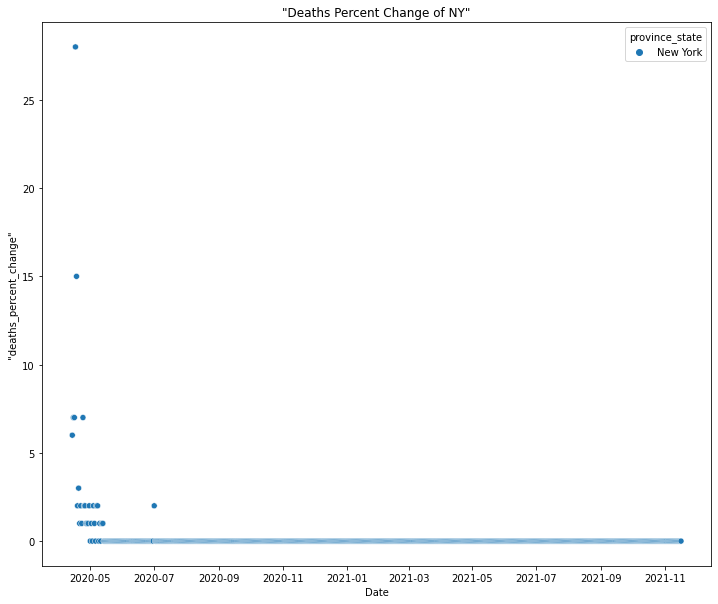

In [95]:
ny2 = pd.read_csv("NY_dea_percentage_change.csv")
ny2.isnull().sum()

#ny2.info()

from datetime import datetime
#change the date column from object to date type
ny2['last_update'] = pd.to_datetime(ny2['last_update'],format='%y-%m-%d %H:%M:%S',exact=False)
#print the new types
#ny2.dtypes

import seaborn as sns
plt.figure(figsize=(12,10))
sns.scatterplot(data=ny2, x='last_update', y='percentage_change',hue ='province_state')
plt.xlabel('Date')
plt.ylabel('"deaths_percent_change"')
plt.title('"Deaths Percent Change of NY"')
plt.show()

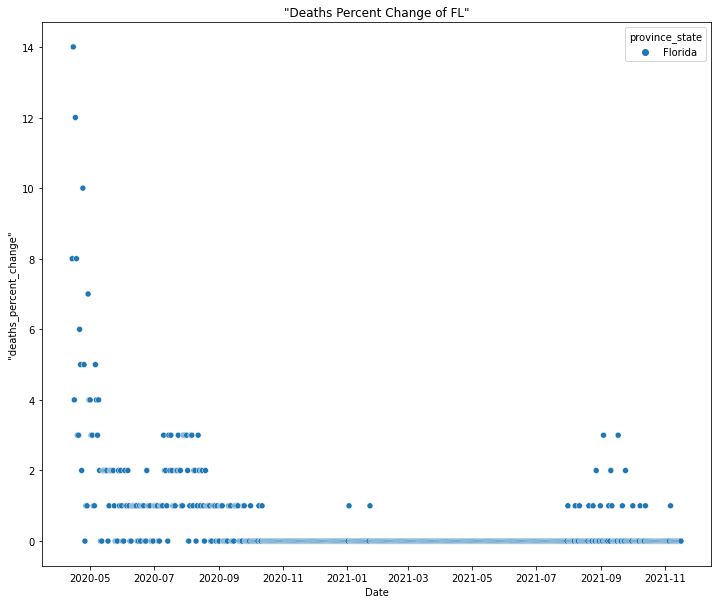

In [96]:
fl2 = pd.read_csv("FL_dea_percentage_change.csv")
fl2.isnull().sum()

#fl2.info()

from datetime import datetime
#change the date column from object to date type
fl2['last_update'] = pd.to_datetime(fl2['last_update'],format='%y-%m-%d %H:%M:%S',exact=False)
#print the new types
#fl2.dtypes

import seaborn as sns
plt.figure(figsize=(12,10))
sns.scatterplot(data=fl2, x='last_update', y='percentage_change',hue ='province_state')
plt.xlabel('Date')
plt.ylabel('"deaths_percent_change"')
plt.title('"Deaths Percent Change of FL"')
plt.show()

#### From comparing the percentage of confirmed change between NY and FL, NY has less increase on confirmed cases after NY government has released actions such as shutdown, reopen NY step by step meet the phases requirements, etc. on the opposite way, before the vaccine comes out. FL didn’t tackle any straight actions on help slow the spread of covid19. Therefore, people had more chance to be exposed to virus which help increase the percentage. So, government regulation has made some contribution to slow the spread of covid-19. This also lead to  intuiative result of more increase changes of deaths in FL than NY.

## Question2
## what is the effectiveness of vaccine?

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime


%matplotlib inline

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [440]:
case = pd.read_csv("cases_death.csv")
ppl = pd.read_csv("ppl_vaccine_data.csv")

In [441]:
a = ppl[(ppl.Province_State != "Massachusetts")].index
a = ppl.drop(a)
a["time"] = pd.to_datetime(a["Date"])
a.sort_values(by="time")

,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated,time
9620,25.0,Massachusetts,US,2020-12-10,42.2302,-71.5301,"Massachusetts, US",NaN,NaN,2020-12-10
9621,25.0,Massachusetts,US,2020-12-11,42.2302,-71.5301,"Massachusetts, US",NaN,NaN,2020-12-11
9622,25.0,Massachusetts,US,2020-12-12,42.2302,-71.5301,"Massachusetts, US",NaN,NaN,2020-12-12
9623,25.0,Massachusetts,US,2020-12-13,42.2302,-71.5301,"Massachusetts, US",NaN,NaN,2020-12-13
9624,25.0,Massachusetts,US,2020-12-14,42.2302,-71.5301,"Massachusetts, US",NaN,NaN,2020-12-14
...,...,...,...,...,...,...,...,...,...,...
9973,25.0,Massachusetts,US,2021-11-28,42.2302,-71.5301,"Massachusetts, US",4883284.0,973645.0,2021-11-28
9974,25.0,Massachusetts,US,2021-11-29,42.2302,-71.5301,"Massachusetts, US",4901041.0,1005487.0,2021-11-29
9975,25.0,Massachusetts,US,2021-11-30,42.2302,-71.5301,"Massachusetts, US",4906398.0,1006297.0,2021-11-30
9976,25.0,Massachusetts,US,2021-12-01,42.2302,-71.5301,"Massachusetts, US",4912745.0,1009715.0,2021-12-01


In [442]:
a["month"] = a["time"].dt.month
a.columns

Index(['FIPS', 'Province_State', 'Country_Region', 'Date', 'Lat', 'Long_',
       'Combined_Key', 'People_Fully_Vaccinated',
       'People_Partially_Vaccinated', 'time', 'month'],
      dtype='object')

In [443]:
a.drop(
    columns=[
        "FIPS",
        "Date",
        "Lat",
        "Long_",
        "Combined_Key",
        "Country_Region",
        "People_Partially_Vaccinated",
    ],
    inplace=True,
)

In [444]:
a = a.set_index(["time"])
a = a.loc["2021-1-1":"2021-11-16"]

In [445]:
e = ppl[(ppl.Province_State != "Virginia")].index
f = ppl.drop(e)
f["time"] = pd.to_datetime(f["Date"])
f.sort_values(by="time")

,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated,time
20002,51.0,Virginia,US,2020-12-10,37.7693,-78.17,"Virginia, US",NaN,NaN,2020-12-10
20003,51.0,Virginia,US,2020-12-11,37.7693,-78.17,"Virginia, US",NaN,NaN,2020-12-11
20004,51.0,Virginia,US,2020-12-12,37.7693,-78.17,"Virginia, US",NaN,NaN,2020-12-12
20005,51.0,Virginia,US,2020-12-13,37.7693,-78.17,"Virginia, US",NaN,NaN,2020-12-13
20006,51.0,Virginia,US,2020-12-14,37.7693,-78.17,"Virginia, US",NaN,NaN,2020-12-14
...,...,...,...,...,...,...,...,...,...,...
20355,51.0,Virginia,US,2021-11-28,37.7693,-78.17,"Virginia, US",5524860.0,877405.0,2021-11-28
20356,51.0,Virginia,US,2021-11-29,37.7693,-78.17,"Virginia, US",5537205.0,907109.0,2021-11-29
20357,51.0,Virginia,US,2021-11-30,37.7693,-78.17,"Virginia, US",5542940.0,908505.0,2021-11-30
20358,51.0,Virginia,US,2021-12-01,37.7693,-78.17,"Virginia, US",5551137.0,908111.0,2021-12-01


In [446]:
f["month"] = f["time"].dt.month
f.columns

Index(['FIPS', 'Province_State', 'Country_Region', 'Date', 'Lat', 'Long_',
       'Combined_Key', 'People_Fully_Vaccinated',
       'People_Partially_Vaccinated', 'time', 'month'],
      dtype='object')

In [447]:
f.drop(
    columns=[
        "FIPS",
        "Date",
        "Lat",
        "Long_",
        "Combined_Key",
        "Country_Region",
        "People_Partially_Vaccinated",
    ],
    inplace=True,
)

In [448]:
f = f.set_index(["time"])
f = f.loc["2021-1-1":"2021-11-16"]

In [449]:
s = ppl[(ppl.Province_State != "Maryland")].index
t = ppl.drop(s)
t["time"] = pd.to_datetime(t["Date"])
t.sort_values(by="time")

,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated,time
9262,24.0,Maryland,US,2020-12-10,39.0639,-76.8021,"Maryland, US",NaN,NaN,2020-12-10
9263,24.0,Maryland,US,2020-12-11,39.0639,-76.8021,"Maryland, US",NaN,NaN,2020-12-11
9264,24.0,Maryland,US,2020-12-12,39.0639,-76.8021,"Maryland, US",NaN,NaN,2020-12-12
9265,24.0,Maryland,US,2020-12-13,39.0639,-76.8021,"Maryland, US",NaN,NaN,2020-12-13
9266,24.0,Maryland,US,2020-12-14,39.0639,-76.8021,"Maryland, US",NaN,NaN,2020-12-14
...,...,...,...,...,...,...,...,...,...,...
9615,24.0,Maryland,US,2021-11-28,39.0639,-76.8021,"Maryland, US",4077493.0,558406.0,2021-11-28
9616,24.0,Maryland,US,2021-11-29,39.0639,-76.8021,"Maryland, US",4084557.0,566115.0,2021-11-29
9617,24.0,Maryland,US,2021-11-30,39.0639,-76.8021,"Maryland, US",4090430.0,567404.0,2021-11-30
9618,24.0,Maryland,US,2021-12-01,39.0639,-76.8021,"Maryland, US",4099736.0,565254.0,2021-12-01


In [450]:
t["month"] = t["time"].dt.month
t.columns

Index(['FIPS', 'Province_State', 'Country_Region', 'Date', 'Lat', 'Long_',
       'Combined_Key', 'People_Fully_Vaccinated',
       'People_Partially_Vaccinated', 'time', 'month'],
      dtype='object')

In [451]:
t.drop(
    columns=[
        "FIPS",
        "Date",
        "Lat",
        "Long_",
        "Combined_Key",
        "Country_Region",
        "People_Partially_Vaccinated",
    ],
    inplace=True,
)

In [452]:
t = t.set_index(["time"])
t = t.loc["2021-1-1":"2021-11-16"]

In [453]:
t["Massachusetts"] = a["People_Fully_Vaccinated"]

In [454]:
t["Virginia"] = f["People_Fully_Vaccinated"]

In [455]:
t.drop(columns=["Province_State"], inplace=True)
t = t.set_index(["month"])
t = t.rename(columns={"People_Fully_Vaccinated": "Maryland"})

<AxesSubplot:xlabel='month'>

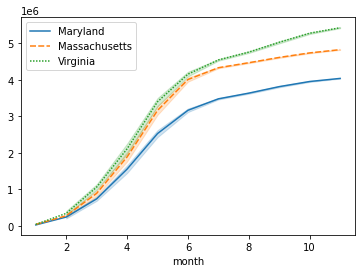

In [456]:
sns.lineplot(data=t)

In [457]:
mas = case[(case.Province_State != "Massachusetts")].index
mas = case.drop(mas)
mas["time"] = pd.to_datetime(mas["Last_Update"])
mas = mas.sort_values(by="time")

In [458]:
mas["month"] = mas["time"].dt.month
mas.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'time', 'month'],
      dtype='object')

In [459]:
mas.drop(
    columns=[
        "Country_Region",
        "Last_Update",
        "Lat",
        "Long_",
        "FIPS",
        "UID",
        "ISO3",
        "Testing_Rate",
        "Hospitalization_Rate",
    ],
    inplace=True,
)

In [460]:
mas = mas.set_index(["time"])
mas = mas.loc["2021-1-2":"2021-11-16"]
mas

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,month
time,,,,,,,,,,
2021-01-02 05:30:44,Massachusetts,375178,12423,261672.0,101083.0,5443.276557,10944699.0,NaN,3.311228,1
2021-01-03 05:30:33,Massachusetts,384181,12502,261672.0,110007.0,5573.896740,11046093.0,NaN,3.254195,1
2021-01-04 05:30:45,Massachusetts,387662,12610,261672.0,113380.0,5624.400889,11090924.0,NaN,3.252834,1
2021-01-05 05:30:33,Massachusetts,392568,12671,261672.0,118225.0,5695.579675,11146494.0,NaN,3.227721,1
2021-01-06 05:30:39,Massachusetts,397202,12734,261672.0,122796.0,5762.812145,11206212.0,NaN,3.205925,1
...,...,...,...,...,...,...,...,...,...,...
2021-11-12 04:32:16,Massachusetts,869293,19138,NaN,NaN,12612.152653,31938436.0,NaN,2.201559,11
2021-11-13 04:32:40,Massachusetts,873281,19159,NaN,NaN,12670.012621,31938436.0,NaN,2.193910,11
2021-11-14 04:32:00,Massachusetts,873281,19159,NaN,NaN,12670.012621,32125866.0,NaN,2.193910,11


In [461]:
a = case[(case.Province_State != "Virginia")].index
b = case.drop(a)
b["time"] = pd.to_datetime(b["Last_Update"])
b = b.sort_values(by="time")

In [462]:
b["month"] = b["time"].dt.month
b.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'time', 'month'],
      dtype='object')

In [463]:
b.drop(
    columns=[
        "Country_Region",
        "Last_Update",
        "Lat",
        "Long_",
        "FIPS",
        "UID",
        "ISO3",
        "Testing_Rate",
        "Hospitalization_Rate",
    ],
    inplace=True,
)

In [464]:
c = b.set_index(["time"])
c = c.loc["2021-1-2":"2021-11-16"]
c

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,month
time,,,,,,,,,,
2021-01-02 05:30:44,Virginia,354766,5081,30964.0,318721.0,4156.349485,4291320.0,NaN,1.432212,1
2021-01-03 05:30:33,Virginia,358755,5117,31182.0,322456.0,4203.083609,4337939.0,NaN,1.426322,1
2021-01-04 05:30:45,Virginia,363765,5124,31368.0,327273.0,4261.779512,4365480.0,NaN,1.408602,1
2021-01-05 05:30:33,Virginia,367536,5132,31561.0,330843.0,4305.959602,4383477.0,NaN,1.396326,1
2021-01-06 05:30:39,Virginia,371913,5191,31735.0,334987.0,4357.239437,4404641.0,NaN,1.395757,1
...,...,...,...,...,...,...,...,...,...,...
2021-11-12 04:32:16,Virginia,941371,14294,NaN,NaN,11028.866552,10122121.0,NaN,1.518424,11
2021-11-13 04:32:40,Virginia,942837,14321,NaN,NaN,11046.041840,10145595.0,NaN,1.518926,11
2021-11-14 04:32:00,Virginia,942837,14321,NaN,NaN,11046.041840,10166445.0,NaN,1.518926,11


In [465]:
d = case[(case.Province_State != "Maryland")].index
e = case.drop(d)
e["time"] = pd.to_datetime(e["Last_Update"])
e = e.sort_values(by="time")

In [466]:
e["month"] = e["time"].dt.month
e.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'time', 'month'],
      dtype='object')

In [467]:
e.drop(
    columns=[
        "Province_State",
        "Country_Region",
        "Last_Update",
        "Lat",
        "Long_",
        "Deaths",
        "Recovered",
        "Active",
        "FIPS",
        "Incident_Rate",
        "Total_Test_Results",
        "People_Hospitalized",
        "Case_Fatality_Ratio",
        "UID",
        "ISO3",
        "Testing_Rate",
        "Hospitalization_Rate",
    ],
    inplace=True,
)

In [468]:
r = e.set_index(["time"])
r = r.loc["2021-1-2":"2021-11-16"]
r

,Confirmed,month
time,,
2021-01-02 05:30:44,280219,1
2021-01-03 05:30:33,283171,1
2021-01-04 05:30:45,285319,1
2021-01-05 05:30:33,287802,1
2021-01-06 05:30:39,289758,1
...,...,...
2021-11-12 04:32:16,568914,11
2021-11-13 04:32:40,569823,11
2021-11-14 04:32:00,570806,11


In [469]:
r["Massachusetts"] = mas["Confirmed"]

In [470]:
r["Virginia"] = c["Confirmed"]

In [471]:
r = r.set_index(["month"])
r = r.rename(columns={"Confirmed": "Maryland"})
r

,Maryland,Massachusetts,Virginia
month,,,
1,280219,375178,354766
1,283171,384181,358755
1,285319,387662,363765
1,287802,392568,367536
1,289758,397202,371913
...,...,...,...
11,568914,869293,941371
11,569823,873281,942837
11,570806,873281,942837


<AxesSubplot:xlabel='month'>

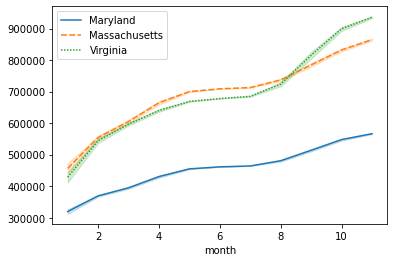

In [472]:
sns.lineplot(data=r)

<AxesSubplot:xlabel='month'>

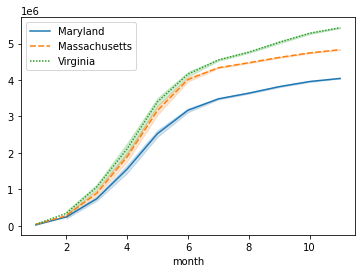

In [473]:
sns.lineplot(data=t)

<AxesSubplot:xlabel='month'>

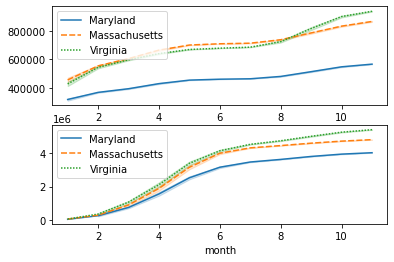

In [474]:
f = plt.figure()

f.add_subplot(2, 1, 1)

sns.lineplot(data=r)

f.add_subplot(2, 1, 2)

sns.lineplot(data=t)

### Given the data, we want to know the effectiveness of the vaccines.
### In order to analyze, we decide to use a comparison graph of cumulative fully vaccinated people and confirmed cases
### To avoid outlier, we choose three stats based on its population.
### Which are Maryland, Massachusetts and Virginia.

### Before we get to our analysis, let me briefly talked about how we make the graph and what is on the graph.
### Given the dataset, first thing we did is to clear our data, so only fully vaccinated people and confirmed case would be
### in our final dataset.
### Then, we rank it by time so that we can have a clear sense of the graph.
### Last by not least, we only want data between 2021-1-2 and 2021-11-16, because that is around the time people start to get
### vaccinated.
### As you can see on the first graph, the x-axis is month and y-axis is confirmed case.
### On the second graph, the x-axis is month and y-axis is fully vaccinated people.
### the reason we did not combine two graph is due to the total number of fully vaccinated people is way beyond the total
### number of confirmed case.

### For the second graph, we can see that from January to June, the graowth rate of people getting vaccinated is concave up
### after June, the graowth rate gradually reduced. Mainly caused by the fact that majority of people have been vaccinated.

### For the first graph, we can see, thanks to the vaccine, the growth rate of confirmed case is concave down.
### Meaning even though there is more people getting covid, but the spread has been gradually controlled.
### However, we can see from August to November, the growth rate has changed to concave up,
### Meaning the spread is accelarating.
### As you may remeber, that is around the time we discover Deata Variant, a variant that is much more destructive.
### Also, since majority of people has been vaccinated, people start being less protective of themseleves,
### Given us more exposure to the new variant.
### In short, based on our analysis, vaccine is the best way to fight virus.
### Given the current accelrated spread of virus, it would be a better choice to have a booster shot and wear masks.

## Question 3
## During thanksgiving holidays and Christmas hoilday 2020, did cases/ death increase significantly ?

In [4]:
%%sql
select * from casesdeath where province_state = 'District of Columbia' limit 20;

 * postgresql://student@/neel
20 rows affected.


province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate
District of Columbia,US,2021-01-02 05:30:44,38.8974,-77.0268,29252,788,20941.0,7523.0,11.0,4144.816358223675,904302.0,None,2.6938329003145083,84000011.0,USA,128133.65658328953,None
District of Columbia,US,2021-01-03 05:30:33,38.8974,-77.0268,29509,792,21002.0,7715.0,11.0,4181.231570997621,911378.0,None,2.683926937544478,84000011.0,USA,129136.27932876984,None
District of Columbia,US,2021-01-04 05:30:45,38.8974,-77.0268,29764,794,21072.0,7898.0,11.0,4217.363396901731,918000.0,None,2.667652197285311,84000011.0,USA,130074.5732547974,None
District of Columbia,US,2021-01-05 05:30:33,38.8974,-77.0268,29904,797,21127.0,7980.0,11.0,4237.200477790263,921119.0,None,2.6651952915997863,84000011.0,USA,130516.51507830688,None
District of Columbia,US,2021-01-06 05:30:39,38.8974,-77.0268,30166,801,21337.0,8028.0,11.0,4274.3241577388,926717.0,None,2.655307299608831,84000011.0,USA,131309.71492697828,None
District of Columbia,US,2021-01-07 05:30:38,38.8974,-77.0268,30482,806,21461.0,8215.0,11.0,4319.099283172914,932102.0,None,2.644183452529361,84000011.0,USA,132072.73407401214,None
District of Columbia,US,2021-01-08 05:30:47,38.8974,-77.0268,30750,808,21660.0,8282.0,11.0,4357.073123730958,937035.0,None,2.627642276422764,84000011.0,USA,132771.70778846304,None
District of Columbia,US,2021-01-09 05:30:45,38.8974,-77.0268,31107,809,21851.0,8447.0,11.0,4407.657679996712,943818.0,None,2.6007008068923394,84000011.0,USA,133732.81435751234,None
District of Columbia,US,2021-01-10 05:30:28,38.8974,-77.0268,31457,813,22042.0,8602.0,11.0,4457.250382218041,950762.0,None,2.584480401818355,84000011.0,USA,134716.7335695835,None
District of Columbia,US,2021-01-11 05:30:40,38.8974,-77.0268,31791,817,22153.0,8821.0,11.0,4504.57598948068,957350.0,None,2.569909722877544,84000011.0,USA,135650.20991882382,None


In [10]:
%%sql
select confirmed, deaths, TO_CHAR(last_update, 'YYYY-MM-DD') AS full_date from casesdeath 
where (cast(TO_CHAR(last_update, 'YYYY') as integer) = 2020 
and ((cast(TO_CHAR(last_update, 'MM') as integer) = 10 and cast(TO_CHAR(last_update, 'DD') as integer) >= 17)
     or (cast(TO_CHAR(last_update, 'MM') as integer) = 11 and cast(TO_CHAR(last_update, 'DD') as integer) <= 25))) 
and province_state = 'District of Columbia' 
order by last_update asc;

 * postgresql://student@/neel
40 rows affected.


confirmed,deaths,full_date
16255,641,2020-10-17
16334,641,2020-10-18
16370,641,2020-10-19
16395,641,2020-10-20
16445,642,2020-10-21
16498,642,2020-10-22
16537,642,2020-10-23
16609,642,2020-10-24
16706,642,2020-10-25
16767,642,2020-10-26


In [11]:
%matplotlib inline

<BarContainer object of 40 artists>

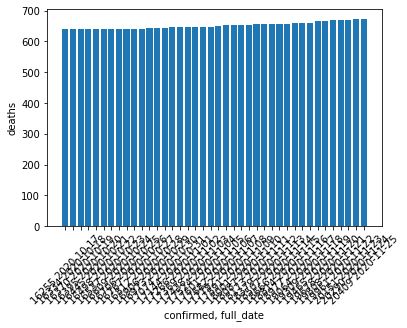

In [12]:
_.bar()

In [20]:
%%sql
select confirmed, deaths, TO_CHAR(last_update, 'YYYY-MM-DD') AS full_date from casesdeath 
where ((cast(TO_CHAR(last_update, 'YYYY') as integer) = 2020 
and ((cast(TO_CHAR(last_update, 'MM') as integer) = 11 and cast(TO_CHAR(last_update, 'DD') as integer) >= 26)
     or cast(TO_CHAR(last_update, 'MM') as integer) = 12))
     or (cast(TO_CHAR(last_update, 'YYYY') as integer) = 2021 and cast(TO_CHAR(last_update, 'MM')as integer) = 1 and cast(TO_CHAR(last_update, 'DD') as integer) <= 4)) and province_state = 'District of Columbia' 
order by last_update asc;

 * postgresql://student@/neel
40 rows affected.


confirmed,deaths,full_date
20516,677,2020-11-26
20736,677,2020-11-27
20937,677,2020-11-28
21308,678,2020-11-29
21448,680,2020-11-30
21552,680,2020-12-01
21685,685,2020-12-02
21842,690,2020-12-03
22164,692,2020-12-04
22480,693,2020-12-05


In [21]:
%matplotlib inline

<BarContainer object of 40 artists>

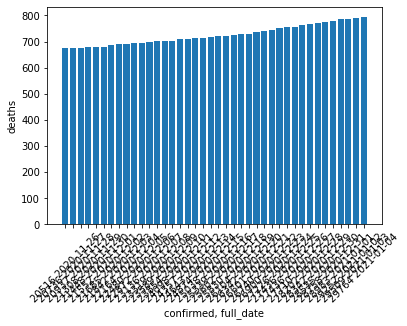

In [22]:
_.bar()

In [23]:
%%sql
select confirmed, deaths, TO_CHAR(last_update, 'YYYY-MM-DD') AS full_date from casesdeath 
where (cast(TO_CHAR(last_update, 'YYYY') as integer) = 2021 
and ((cast(TO_CHAR(last_update, 'MM') as integer) = 1 and cast(TO_CHAR(last_update, 'DD') as integer) >= 5)
     or (cast(TO_CHAR(last_update, 'MM') as integer) = 2 and cast(TO_CHAR(last_update, 'DD') as integer) <= 13))) 
and province_state = 'District of Columbia' 
order by last_update asc;

 * postgresql://student@/neel
40 rows affected.


confirmed,deaths,full_date
29904,797,2021-01-05
30166,801,2021-01-06
30482,806,2021-01-07
30750,808,2021-01-08
31107,809,2021-01-09
31457,813,2021-01-10
31791,817,2021-01-11
31993,821,2021-01-12
32423,825,2021-01-13
32600,831,2021-01-14


In [24]:
%matplotlib inline

<BarContainer object of 40 artists>

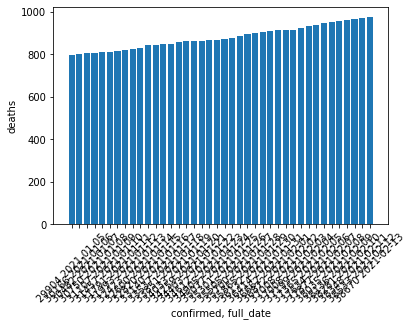

In [25]:
_.bar()

#### We observe that the COVID-19 Death rates for Holiday period totalling to 40 days, from Thanksgiving to New years has increased by 117, from 677 on 26 Nov, 2020 to 794 on 4 Jan, 2021.
#### When we compared similar time period for 40 days, before the holidays we observed a 32 death cases, while after the holidays there was a drastic increase in death cases accounting to a total of 179

## Question 4
## Explore how the mask policy affected the covid-19 spread by comparing NY and TX confirmed cases after 4/15/2020 NY started to mandate mask outdoor.

In [81]:
%%sql
select * from casesdeath
limit 1

 * postgresql://student@/ves
1 rows affected.


province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,fips,incident_rate,total_test_results,people_hospitalized,case_fatality_ratio,uid,iso3,testing_rate,hospitalization_rate,loc_key,date_key
Diamond Princess,US,2021-01-12 05:30:28,None,None,49,0,None,49.0,88888.0,None,None,None,0.0,84088888.0,USA,None,None,52,670


In [82]:
%%sql
select * from date
limit 1

 * postgresql://student@/ves
1 rows affected.


key,full_time,full_date,year,month,day
1,2021-07-24 04:00:00,2021-07-24,2021,7,24


In [83]:
%%sql
select * from location
limit 1

 * postgresql://student@/ves
1 rows affected.


key,state
1,Nevada


In [156]:
%%sql
drop table if exists mask;
SELECT distinct location.state, date.full_date, sum(Confirmed) as ny_confirmed
INTO mask
FROM casesdeath, date, location
WHERE location.state = 'New York' and location.state = casesdeath.province_state
       and  TO_CHAR(casesdeath.last_update, 'YYYY-MM-DD HH24:00:00') = date.full_time
       and date.full_date > '2020-04-14'
GROUP BY location.state, date.full_date
ORDER By ny_confirmed;

 * postgresql://student@/ves
Done.
580 rows affected.


[]

In [157]:
%%sql
select * from mask
limit 5

 * postgresql://student@/ves
5 rows affected.


state,full_date,ny_confirmed
New York,2020-04-15,214454
New York,2020-04-16,223691
New York,2020-04-17,230597
New York,2020-04-18,241712
New York,2020-04-19,247815


In [140]:
%%sql
\copy mask TO 'mask.csv' DELIMITER ',' CSV HEADER;

 * postgresql://student@/ves
0 rows affected.


[]

In [141]:
%%sql
drop table if exists nomask;
SELECT distinct location.state, date.full_date, sum(Confirmed) as tx_confirmed
INTO nomask
FROM casesdeath, date, location
WHERE location.state = 'Texas' and location.state = casesdeath.province_state
       and  TO_CHAR(casesdeath.last_update, 'YYYY-MM-DD HH24:00:00') = date.full_time
       and date.full_date > '2020-04-14'
GROUP BY location.state, date.full_date
ORDER By tx_confirmed;

 * postgresql://student@/ves
Done.
580 rows affected.


[]

In [142]:
%%sql
select * from nomask
limit 5

 * postgresql://student@/ves
5 rows affected.


state,full_date,tx_confirmed
Texas,2020-04-15,16044
Texas,2020-04-16,16985
Texas,2020-04-17,17925
Texas,2020-04-18,18724
Texas,2020-04-19,19282


In [143]:
%%sql
\copy nomask TO 'nomask.csv' DELIMITER ',' CSV HEADER;

 * postgresql://student@/ves
0 rows affected.


[]

In [145]:
mask = pd.read_csv("mask.csv")
nomask = pd.read_csv("nomask.csv")

<AxesSubplot:>

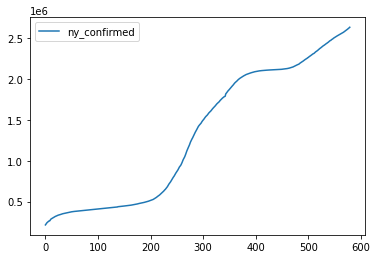

In [146]:
sns.lineplot(data=mask)

<AxesSubplot:>

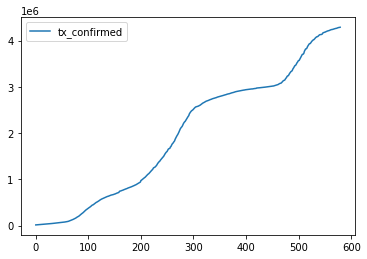

In [147]:
sns.lineplot(data=nomask)

In [154]:
%%sql
ALTER table mask
drop column state

 * postgresql://student@/ves
Done.


[]

In [158]:
%%sql
Select * from mask
limit 5

 * postgresql://student@/ves
5 rows affected.


state,full_date,ny_confirmed
New York,2020-04-15,214454
New York,2020-04-16,223691
New York,2020-04-17,230597
New York,2020-04-18,241712
New York,2020-04-19,247815


In [152]:
%%sql
Select mask.*, nomask.tx_confirmed
from mask
LEFT JOIN nomask
ON mask.full_date=nomask.full_date
limit 5

 * postgresql://student@/ves
5 rows affected.


state,full_date,ny_confirmed,tx_confirmed
New York,2020-04-15,214454,16044
New York,2020-04-16,223691,16985
New York,2020-04-17,230597,17925
New York,2020-04-18,241712,18724
New York,2020-04-19,247815,19282


In [187]:
%%sql
drop table if exists mask_policy;
SELECT distinct mask.full_date, mask.ny_confirmed,nomask.tx_confirmed
INTO mask_policy
FROM mask,nomask
WHERE mask.full_date=nomask.full_date and mask.full_date < '2021-03-11'

 * postgresql://student@/ves
Done.
329 rows affected.


[]

In [188]:
%%sql
select * from mask_policy
limit 5

 * postgresql://student@/ves
5 rows affected.


full_date,ny_confirmed,tx_confirmed
2020-07-02,394079,172859
2020-08-29,432767,625053
2021-02-04,1443942,2449535
2020-12-12,763228,1460691
2020-12-20,847778,1585167


In [189]:
%%sql
\copy mask_policy TO 'mask_policy.csv' DELIMITER ',' CSV HEADER;

 * postgresql://student@/ves
0 rows affected.


[]

In [190]:
mask_policy = pd.read_csv("mask_policy.csv")

<AxesSubplot:>

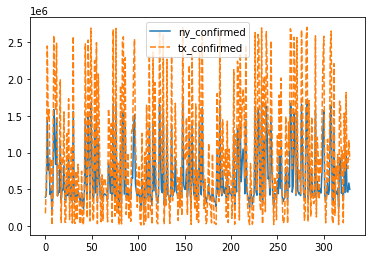

In [191]:
sns.lineplot(data=mask_policy)

#### Findings: With these three plots, we can see how the outdoor mask mandate policy affect the New York state covid spread, after 4/15/2020. Even New York has a higher population density than Texas, the increasing trend of new confirmed cases is still lower than Texas. Since Texas doesn't have any mask mandate until 3/10/2021.

# This is the end of 6305 group project by group 5.